In [20]:
import networkx as nx
import pandas as pd
import numpy as np
import random 
import scipy.stats as stats
import matplotlib.pyplot as plt
import sys, os
import warnings
import processing_module as pm

<span style="color:orange">
Создаём синтетическую последовательность из двух распределений. <br/>
Для этого создадим 2 распределения Парето с разными параметрами.

In [21]:
a1, k1 = 3., 2.  # форма и режим
a2, k2 = 5., 3.
s1 = (np.random.pareto(a1, 1000) + 1) * k1
s2 = (np.random.pareto(a2, 1000) + 1) * k2

In [36]:
X = np.concatenate((s1, s2), axis=0)
X2 = np.concatenate((s1, s2[:100]), axis=0)
print(len(X))
print(len(X2))

2000
1100


In [26]:
def plot_est(Data, label='Data'):
    legend = []
    y, k_find = pm.eye_ball(Data)
    plt.plot(np.arange(1, len(Data)+1), Data)
    plt.axhline(y, color = 'r', linestyle = '-')
    print(y)
    plt.xlabel('k') #Подпись для оси х
    plt.ylabel(label + '(k)') #Подпись для оси y
    plt.title(label) #Название
    plt.ylim(0, 2)
    legend.append(label)
    legend.append(f"{label} stability={y}")
    plt.legend(legend, loc="upper left")
#    plt.savefig(my_path + "/Text" + '/Imagines' + '/' + label)
    plt.show()

In [27]:
gammah1 = pm.hill(s1)
gammah2 = pm.hill(s2)

0.33116089013064276


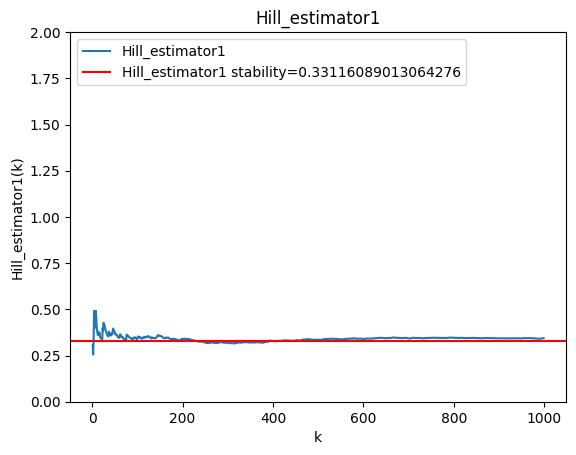

0.1931172360504816


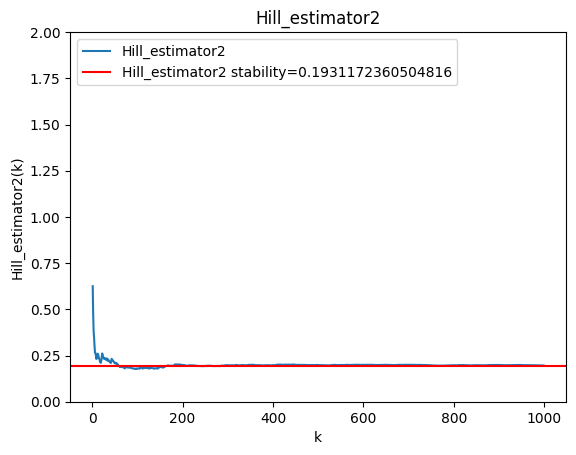

In [29]:
plot_est(gammah1, label='Hill_estimator1')
plot_est(gammah2, label='Hill_estimator2')

In [30]:
list_step, list_tt = pm.test_tail_index(X)

<span style="color:orange">
    
## Global estimator ##

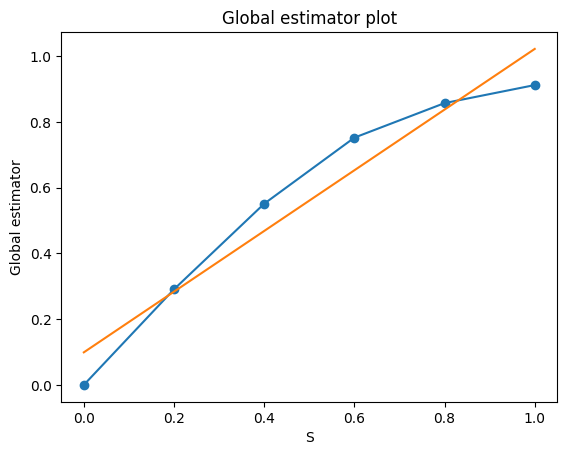

In [31]:
plt.plot(list_step, list_tt, 'o-')
z = np.polyfit(list_step, list_tt, 1)
p = np.poly1d(z)
plt.plot (list_step, p(list_step))
plt.xlabel('S') #Подпись для оси х
plt.ylabel('Global estimator') #Подпись для оси y
plt.title('Global estimator plot') #Название
#plt.savefig(my_path + "/Text" + '/Imagines' + '/tail_time')
plt.show()

<span style="color:orange">

## Тест Phillips and Loretan для разных последовательностей ##

In [37]:
print(pm.phillips_loretan(s1, s1))
print(pm.phillips_loretan(X, X2))

0.0
2.681920149239573
